## Dry beans

According to CAMPOS-VEGA, <em> et al. </em> 2018, dry bean (Phaseolus vulgaris L.) is a staple food for many regions of the world and processing enables consumption and incorporation of this nutrient dense food in daily diets.

![title](Datascience/assorted-dry-beans.png)

In this context, beans are a rich source of vitamins (thiamine, riboflavin, niacin, B6 and folic acid) and minerals (Ca, Fe, Cu, Zn, P, K and Mg). Due to it's low cost source of protein, beans has been used in many countries where protein energy malnutrition is prevalent (HOWARD, <em>et al.</em> 2018).

Actually there are many types of beans around the world, although this dataset focus on 7 different types of dry beans:

* **Seker;**
* **Barbunya;**
* **Bombay;**
* **Cali;**
* **Dermosan;**
* **Horoz;**
* **Sira;**

This dataset was extract of UCI (https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset) and the basic information about it is below:

1. **Area (A):** The area of a bean zone and the number of pixels within its boundaries.
2. **Perimeter (P):** Bean circumference is defined as the length of its border.
3. **Major axis length (L):** The distance between the ends of the longest line that can be drawn from a bean.
4. **Minor axis length (l):** The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. **Aspect ratio (K):** Defines the relationship between L and l.
6. **Eccentricity (Ec):** Eccentricity of the ellipse having the same moments as the region.
7. **Convex area (C):** Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. **Equivalent diameter (Ed):** The diameter of a circle having the same area as a bean seed area.
9. **Extent (Ex):** The ratio of the pixels in the bounding box to the bean area.
10. **Solidity (S):** Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. **Roundness (R):** Calculated with the following formula: (4piA)/(P^2)
12. **Compactness (CO):** Measures the roundness of an object: Ed/L
13. **ShapeFactor1 (SF1)**
14. **ShapeFactor2 (SF2)**
15. **ShapeFactor3 (SF3)**
16. **ShapeFactor4 (SF4)**
17. **Class** (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)



In [1]:
#------------------------------------- Dataset manipulation -------------------------------#
import pandas as pd

#------------------------------------ Dataset visualization -------------------------------#
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#-------------------------------------- Machine learning ---------------------------------#
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score 

/home/arley/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


### Step 1: Dataset initial information

In [2]:
df = pd.read_excel('Dry_Bean_Dataset.xls')

print("################################ DATASET ################################")
print(df.head())

print("")

print("################################ INFO ################################")
print(df.info())

################################ DATASET ################################
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeF

### Step 2: Correlation among variables

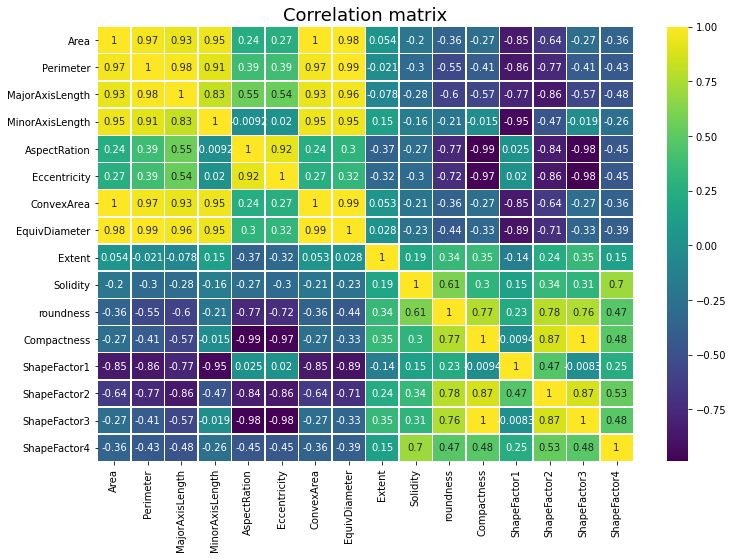

In [3]:
df_atributos = df.drop(columns = ["Class"])

corr = df_atributos.corr()

fig = plt.figure(figsize = (12, 8))

sns.heatmap(data = corr, cmap='viridis', annot=True, linewidths=.5)
plt.title("Correlation matrix", fontsize = 18)

plt.show()

This matrix show us some correlated features like: (Area-Perimeter); (Area-MajorAxisLength); (Area-MinorAxisLength); (Perimeter-MajorAxisLength); (Perimeter-ConvexArea); (Perimeter-EquivDiameter), etc.

### Step 3: Dataset probability distribution

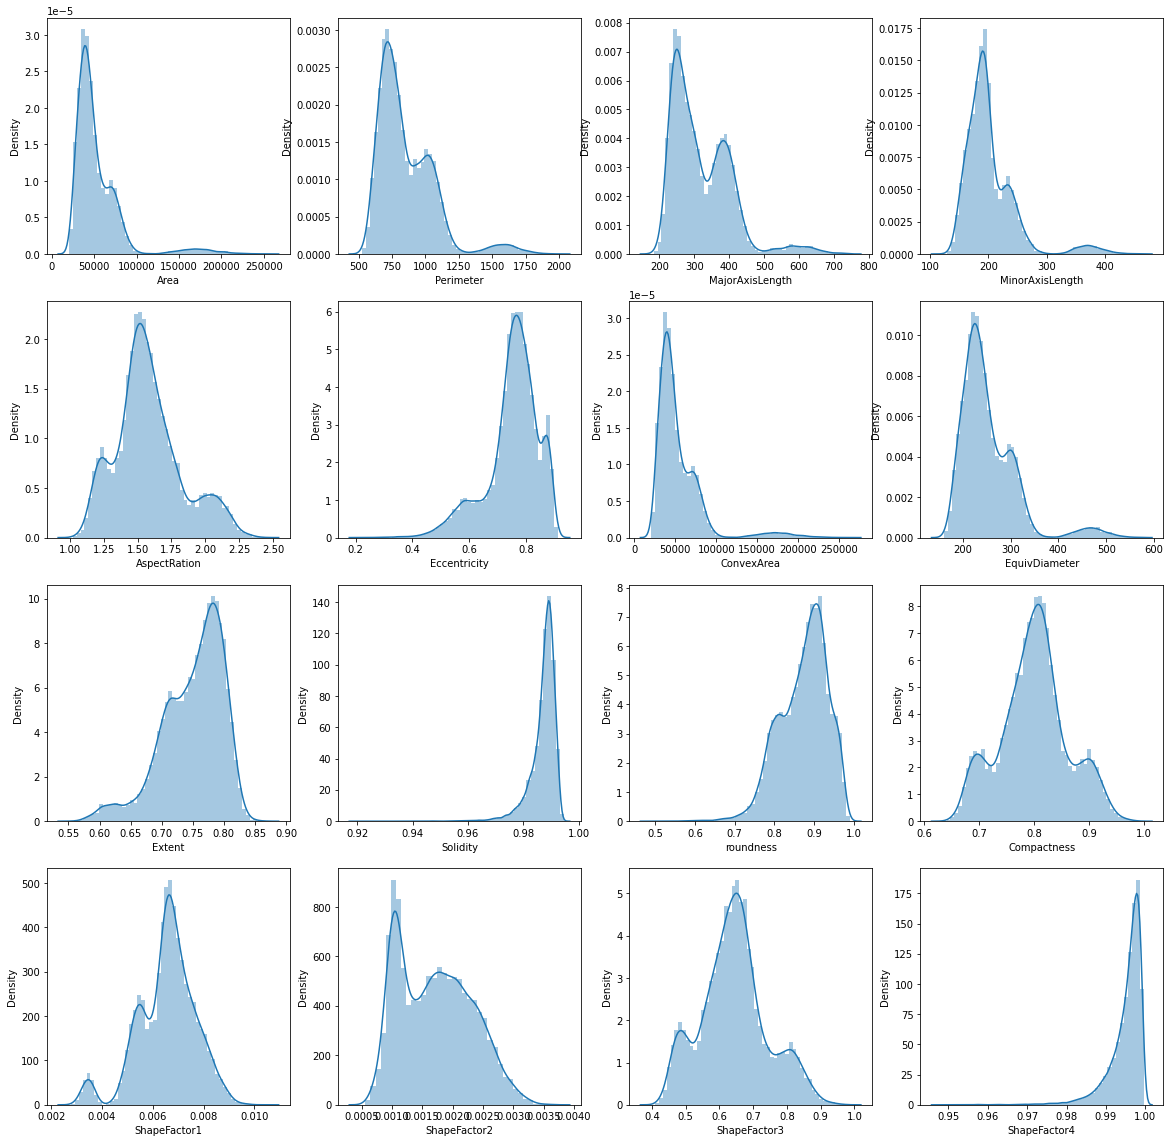

In [4]:
n = 4
m = 4

fig, axe = plt.subplots(n, m, figsize = (20, 20))
columns = df_atributos.columns

for i, ax in enumerate(fig.axes):
    
    sns.distplot( x = df[columns[i]], ax = ax, axlabel= columns[i])

### Setp 4: Target count distribution

Text(0, 0.5, 'Count')

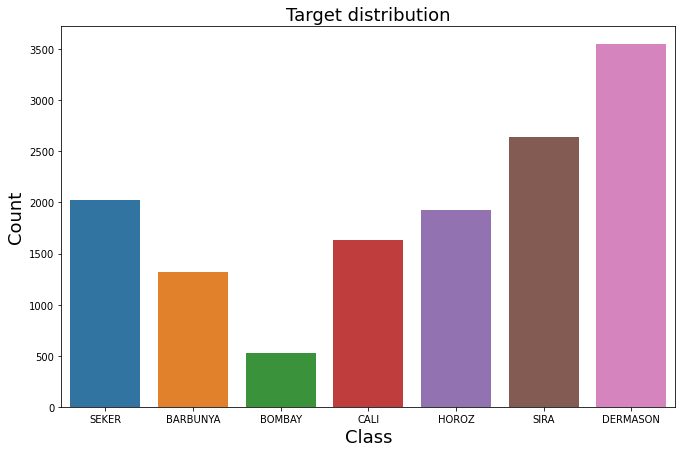

In [5]:
fig = plt.figure(figsize = (11, 7))

sns.countplot(data = df, x = df["Class"])

plt.title("Target distribution", fontsize = 18)
plt.xlabel("Class", fontsize = 18)
plt.ylabel("Count", fontsize = 18)

This countplot show a non-uniformity of dry bean classification. For exemple the amount of **BOMBAY** is less than **DERMASSON**. This might be a weak point, because preditive model can favor a particular class.

### Step 5: Replace categorical features into discrete features

In [6]:
Target = df["Class"].map({"SEKER": 1, "BARBUNYA": 2, "BOMBAY": 3, "CALI": 4, "HOROZ": 5, "SIRA": 6, 
                         "DERMASON": 7})

new_df = df_atributos
new_df["Class"] = Target

print(Target)

0        1
1        1
2        1
3        1
4        1
        ..
13606    7
13607    7
13608    7
13609    7
13610    7
Name: Class, Length: 13611, dtype: int64


### Step 6: Machine learning 

In [7]:
#-------------------------------Train test split----------------------------------#
X_train, X_test, Y_train, Y_test= train_test_split(df_atributos, Target,
                                                   test_size= 0.3, random_state= 101)


#----------------------------- Bagging Classifier ---------------------------------#
BC = BaggingClassifier(DecisionTreeClassifier(), n_estimators= 300,
                      max_samples= 100, bootstrap= True, n_jobs=-1)


#-------------------------- Cross validation (train) ------------------------------#
CV_train = cross_val_score(BC, X_train, Y_train, cv = 5)


#--------------------------- Cross validation (test) ------------------------------#
CV_test = cross_val_score(BC, X_test, Y_test, cv = 5)


#-------------------------------- Model adjust ------------------------------------#
modelo = BC.fit(X_train, Y_train)


#--------------------------- Prediction of train dataset --------------------------#
previsoes_train = modelo.predict(X_train)


#------------------------- Prediction of test dataset -----------------------------#
previsoes_test = modelo.predict(X_test)


#-------------------------- Accuracy of train dataset -----------------------------#
acuracia_train = accuracy_score(Y_train, previsoes_train)


#-------------------------- Accuracy of test dataset ------------------------------#
acuracia_test = accuracy_score(Y_test, previsoes_test)


#---------------------- Confusion matrix of train dataset --------------------------#
matriz_train = confusion_matrix(Y_train, previsoes_train)


#---------------------- Confusion matrix of test dataset ---------------------------#
matriz_test = confusion_matrix(Y_test, previsoes_test)



print("Accuracy of train dataset: ", acuracia_train)
print("")
print("#--------------------- Confusion matrix of train dataset ------------------------#")
print(matriz_train)
print("")
print("#------------------------ Cross validation of train dataset ------------------------------#")
print(CV_train)

print("")
print("")
print("")
print("Accuracy of test dataset: ", acuracia_test)
print("")
print("#--------------------- Confusion matrix of test dataset ------------------------#")
print(matriz_test)
print("")
print("#------------------------ Cross validation of train dataset ------------------------------#")
print(CV_test)


Accuracy of train dataset:  0.9992652461425422

#--------------------- Confusion matrix of train dataset ------------------------#
[[1401    5    0    0    0    0    0]
 [   2  948    0    0    0    0    0]
 [   0    0  353    0    0    0    0]
 [   0    0    0 1147    0    0    0]
 [   0    0    0    0 1358    0    0]
 [   0    0    0    0    0 1830    0]
 [   0    0    0    0    0    0 2483]]

#------------------------ Cross validation of train dataset ------------------------------#
[1.         1.         0.99895013 0.99790026 0.99790026]



Accuracy of test dataset:  0.9995102840352595

#--------------------- Confusion matrix of test dataset ------------------------#
[[ 621    0    0    0    0    0    0]
 [   1  371    0    0    0    0    0]
 [   0    0  169    0    0    0    0]
 [   1    0    0  482    0    0    0]
 [   0    0    0    0  570    0    0]
 [   0    0    0    0    0  806    0]
 [   0    0    0    0    0    0 1063]]

#------------------------ Cross validation of train 

* The result obtained here show us a good relation between the features and target, in order to use features to predict the kind of dry bean. The metrics in both dataset (train and test) are similar in a good point, indicating a high probability of non overfitting. This statement can be verified taking a look of cross validation results that are almost the same.  

* The machine learning step, reveals physical parameters of beans (like area, perimeter, etc.) as good indicators  of dry bean types. In a physical point of view, there is no needed of some other parameters (like chemical or molecular) to identified, with a good precision, types of dry beans.

## References:

* Campos-Vega, R.; Bassinello, P. Z.; Santiago, R. A. C.; Oomah, B. D.; **Chapter 20 - Dry Beans: Processing and Nutritional Effects**. <em> Therapeutic, Probiotic, and Unconventional Foods </em>, p. 367-386, 2018;

* Howard, L. R.; White, B. L.; Uebersax, M. A.; Siddiq, M.; **Dry Beans Processing, Quality Evaluation, and Nutrition**. <em> Handbook of Vegetables and Vegetable Processing </em>, vol 2, 2018.